In [9]:
import pandas as pd
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("reviews.csv", parse_dates=["Timestamp"])

In [3]:
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [7]:
data["Day"]= data["Timestamp"].dt.date
day_average=data.groupby(["Day"]).mean()
day_average.head()

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077


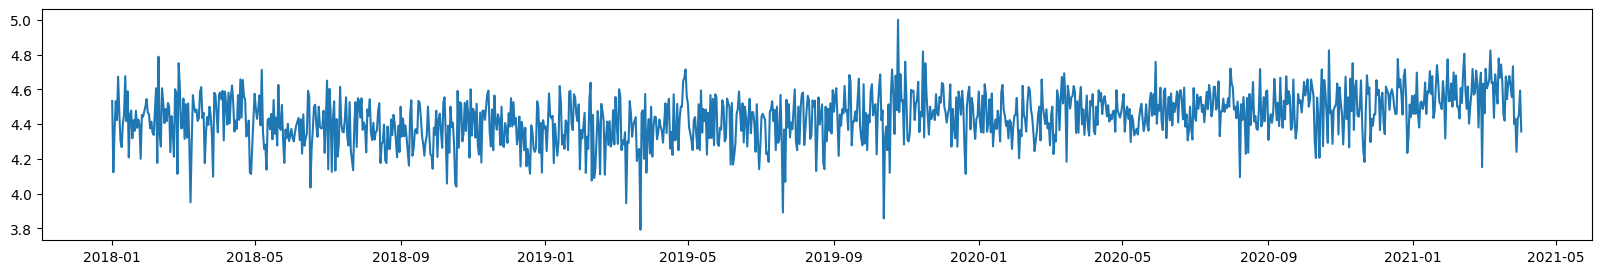

In [13]:
plt.figure(figsize=(20,3))
plt.plot(day_average.index, day_average["Rating"])

In [14]:
#using Day column seems to precise, one cannot learn much from this graph

In [19]:
data["Week"]= data["Timestamp"].dt.strftime("%Y-%U")
week_average=data.groupby(["Week"]).mean()
week_average.head()

,Rating
Week,
2018-00,4.434564
2018-01,4.424933
2018-02,4.417702
2018-03,4.401024
2018-04,4.468085


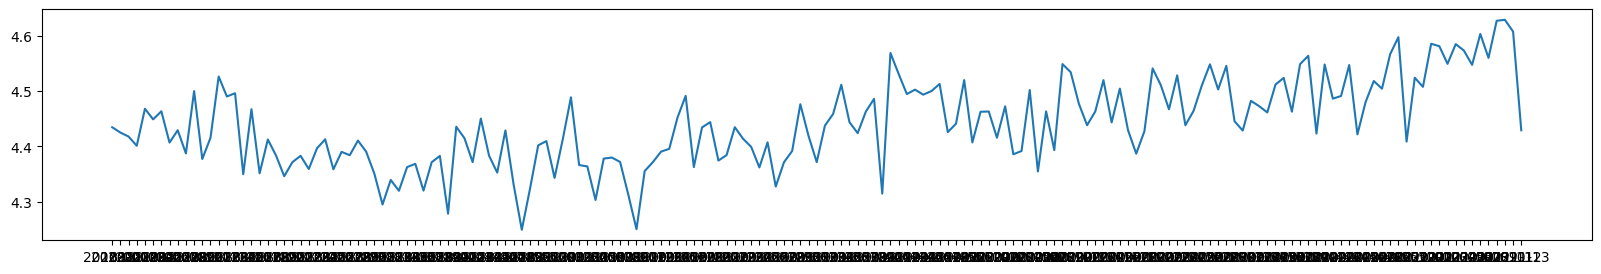

In [21]:
plt.figure(figsize=(20,3))
plt.plot(week_average.index, week_average["Rating"])

In [22]:
data["Month"]= data["Timestamp"].dt.strftime("%Y-%m")
monthly_average=data.groupby(["Month"]).mean()
monthly_average.head()

,Rating
Month,
2018-01,4.429645
2018-02,4.436248
2018-03,4.421671
2018-04,4.468211
2018-05,4.396420


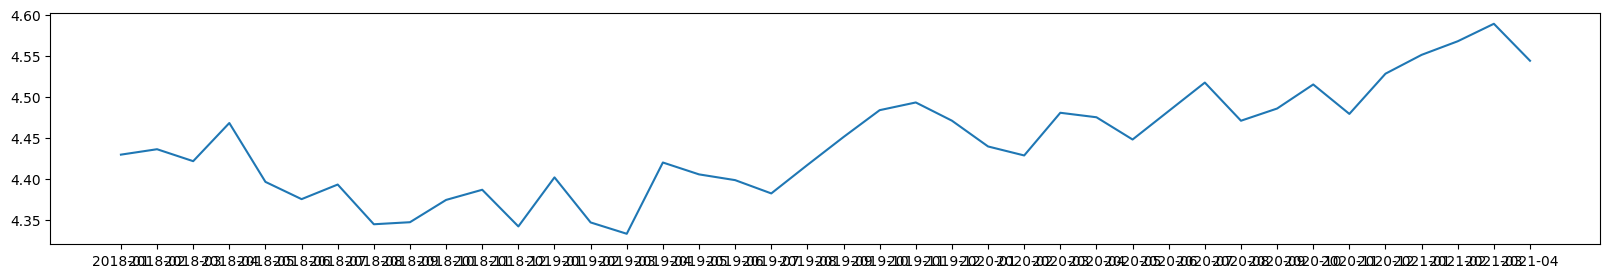

In [23]:
plt.figure(figsize=(20,3))
plt.plot(monthly_average.index, monthly_average["Rating"])

In [24]:
#using weekly/monthly reading allows to understand the data more

## Course ratings over time

In [25]:
data["Month"]= data["Timestamp"].dt.strftime("%Y-%m")
data.head()

,Course Name,Timestamp,Rating,Comment,Day,Week,Month
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021-13,2021-04
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021-13,2021-04
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021-13,2021-04
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021-13,2021-04
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021-13,2021-04


In [33]:
month_average_course=data.groupby(["Month", "Course Name"]).mean().unstack() #create pivot table

<AxesSubplot:xlabel='Month'>

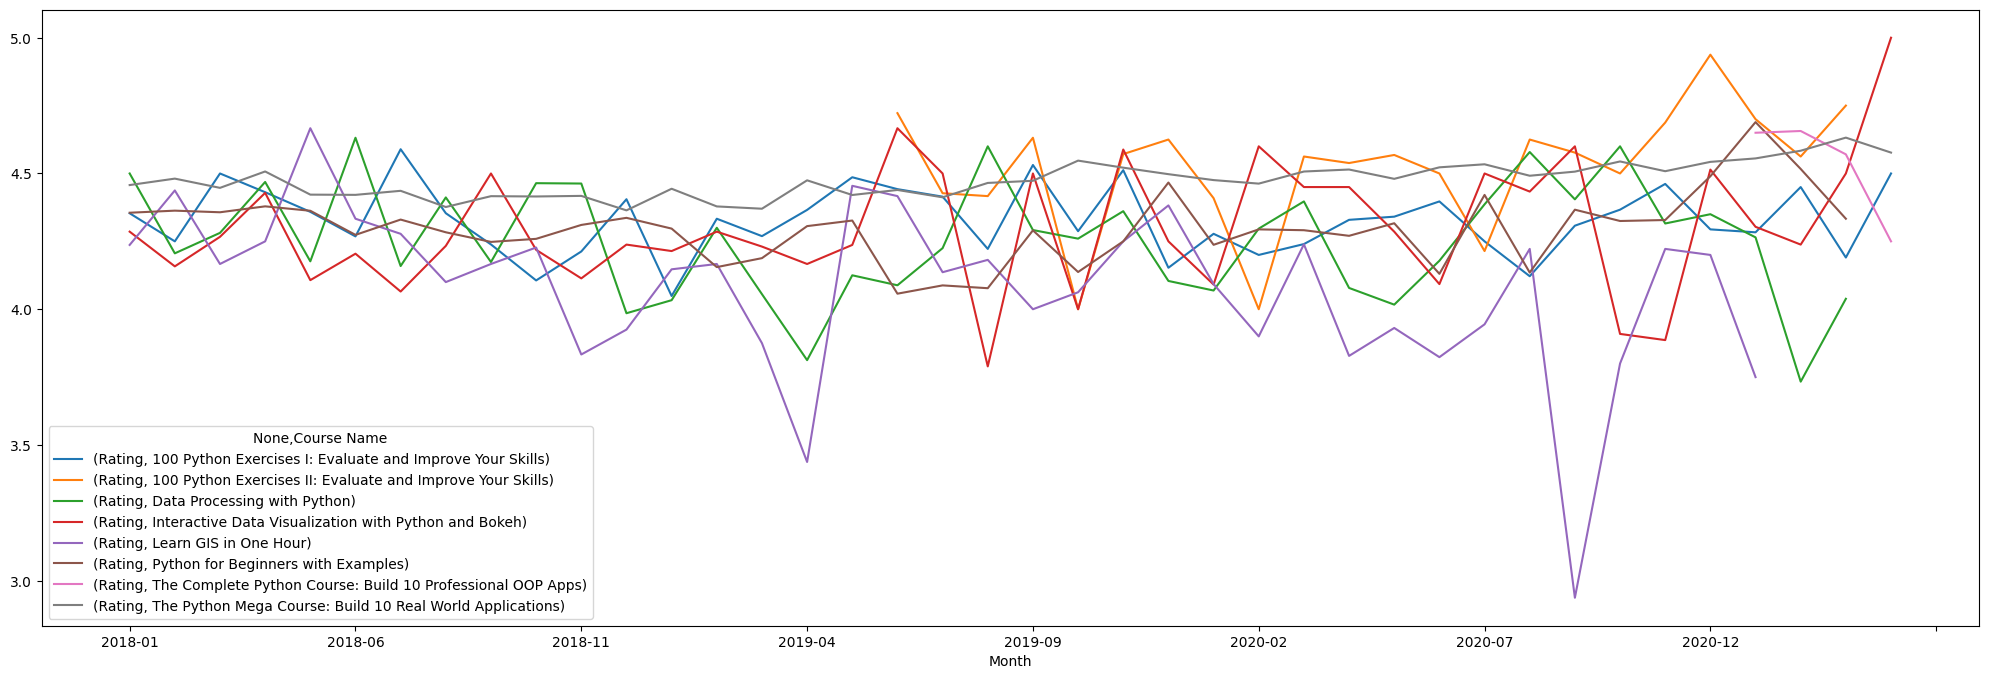

In [37]:
month_average_course.plot(figsize=(25,8))

In [40]:
month_count_course=data.groupby(["Month", "Course Name"])["Rating"].count().unstack()

<AxesSubplot:xlabel='Month'>

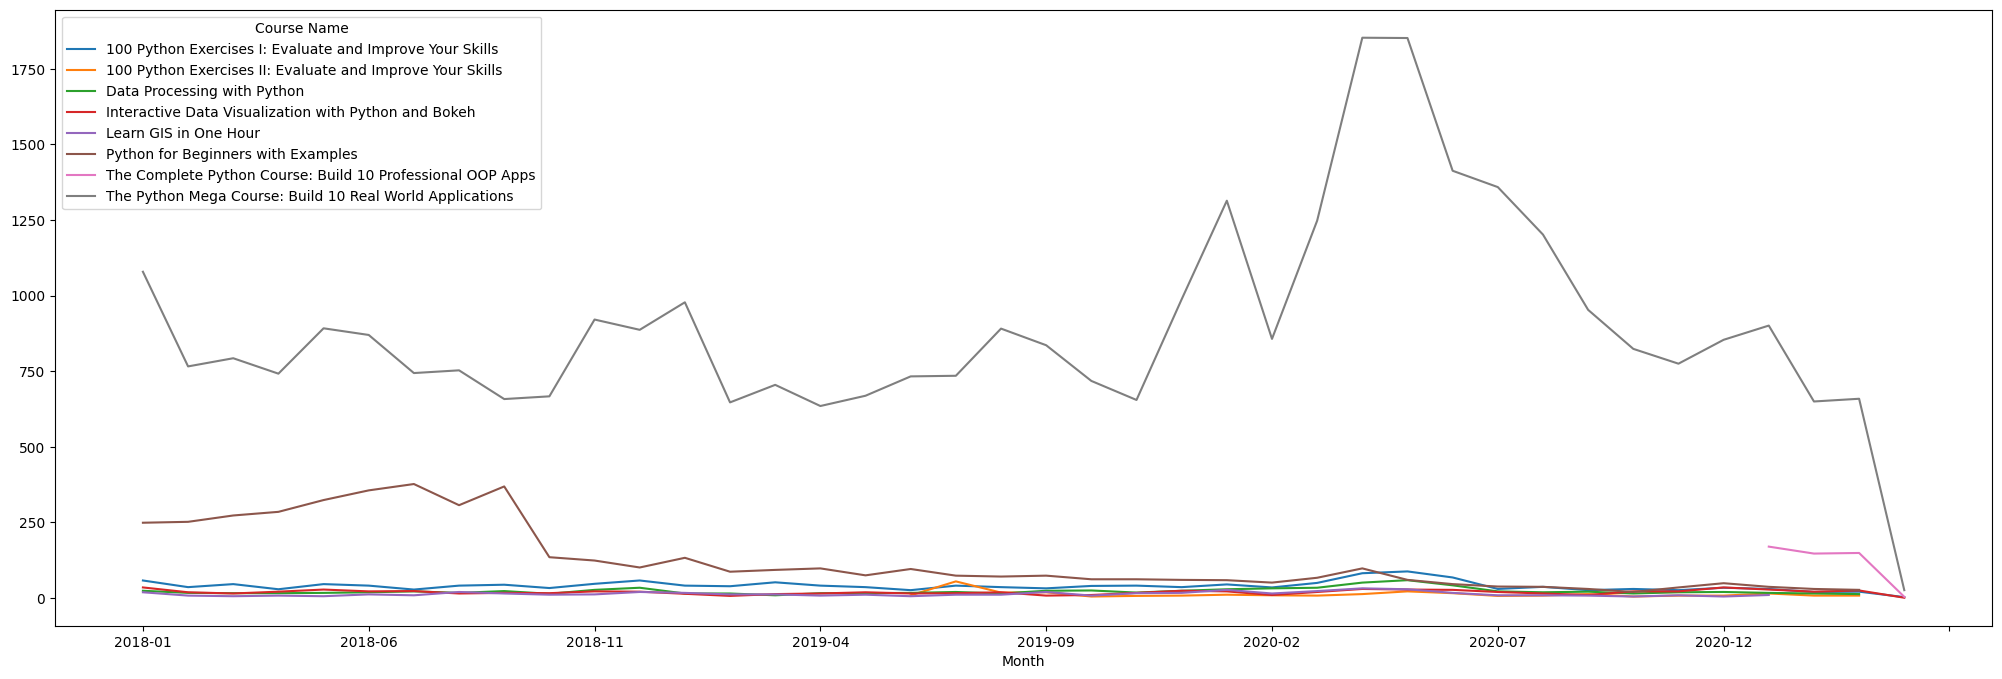

In [41]:
month_count_course.plot(figsize=(25,8))

## What day were people the happiest with course?

In [43]:
data["Weekday"]=data["Timestamp"].dt.strftime("%A")
data

,Course Name,Timestamp,Rating,Comment,Day,Week,Month,Weekday
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021-13,2021-04,Friday
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021-13,2021-04,Friday
...,...,...,...,...,...,...,...,...
44995,Python for Beginners with Examples,2018-01-01 01:11:26+00:00,4.0,NaN,2018-01-01,2018-00,2018-01,Monday
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN,2018-01-01,2018-00,2018-01,Monday
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN,2018-01-01,2018-00,2018-01,Monday
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN,2018-01-01,2018-00,2018-01,Monday


In [44]:
weekday_average=data.groupby(["Weekday"]).mean()

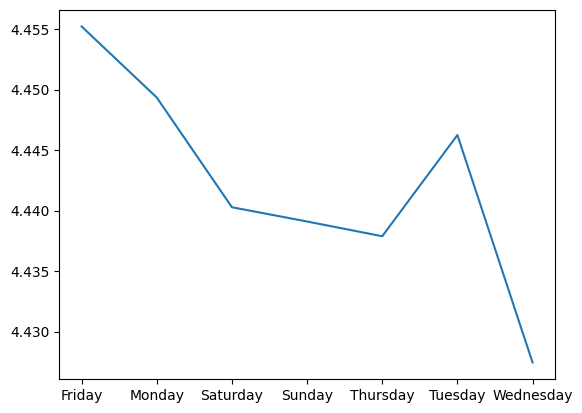

In [45]:
plt.plot(weekday_average.index, weekday_average["Rating"])

In [46]:
data["Daytype"]=data["Timestamp"].dt.strftime("%w")

In [47]:
data

,Course Name,Timestamp,Rating,Comment,Day,Week,Month,Weekday,Daytype
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021-13,2021-04,Friday,5
...,...,...,...,...,...,...,...,...,...
44995,Python for Beginners with Examples,2018-01-01 01:11:26+00:00,4.0,NaN,2018-01-01,2018-00,2018-01,Monday,1
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN,2018-01-01,2018-00,2018-01,Monday,1
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN,2018-01-01,2018-00,2018-01,Monday,1
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN,2018-01-01,2018-00,2018-01,Monday,1
